# 미래 예측 feature로 2021~2035 가스수요 예측하기
---

In [1]:
# 모듈 로딩
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import random
random.seed(42)

import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')

## 1. 데이터 전처리
---

In [2]:
POWER_FIRE = pd.read_csv('./pred_POWER_FIRE.csv')
ELEC_ALL = pd.read_csv('./pred_ELEC_ALL.csv')

POWER_FIRE = POWER_FIRE['yhat']
ELEC_ALL = ELEC_ALL['yhat']

In [3]:
# 모델 학습할 데이터
train_feature = pd.read_csv('./data_tomato.csv')
train_target = pd.read_csv('./target.csv')
train_feature

,DATE,TCL_AT,TCL_LT,TCL_HT,TEMP_EF_CAP,TEMP_EF_DONGNAM,TEMP_EF_DAEGYUNG,TEMP_EF_CHOONG,TEMP_EF_HONAM,TEMP_EF_MEAN,...,ELEC_SERVICE,ELEC_CIVIL_SUM,ELEC_ARGRI_FISHING,ELEC_MINING,ELEC_MANUFACT,ELEC_INDSUM,RV,GAS_PRICE_IND,OIL_PRICE,QVA
0,1996-01-01,0.004764,-0.189311,0.240528,0.84711,5.91778,6.73765,3.33479,1.88651,3.744768,...,3616542,6988059,301811,80421,8854576,9236808,0.97,26.94,27.86,36550.300000
1,1996-02-01,0.007708,-0.226982,0.372691,0.81430,5.90875,6.73291,3.32638,1.87883,3.732234,...,3551611,6898533,327617,70471,8067220,8465308,0.93,26.94,29.04,36751.000000
2,1996-03-01,0.137972,-0.045631,0.367739,0.60731,5.81529,6.67634,3.22000,1.78740,3.621268,...,3333225,6416945,345359,81877,9250086,9677322,0.96,26.94,27.99,36951.700000
3,1996-04-01,0.261910,0.029456,0.582132,0.24132,5.71003,6.61264,3.07795,1.66054,3.460496,...,3430624,6615182,292235,84596,9274014,9650845,0.94,26.94,28.74,37152.400000
4,1996-05-01,0.428759,0.242892,0.688458,-0.38328,5.67433,6.58956,3.02586,1.62083,3.305460,...,3333483,6370027,302913,80963,9274169,9658045,0.92,26.94,29.18,37365.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2020-08-01,3.341732,3.072238,3.949415,-0.52038,5.55479,6.50341,2.91789,1.55535,3.202212,...,12968200,22252059,1432700,110871,20803586,22347157,0.86,72.93,84.71,122745.133333
296,2020-09-01,2.623888,2.040712,3.317034,-0.48046,5.62159,6.57738,2.98076,1.59811,3.259476,...,12489373,22125819,1535383,124192,21325400,22984975,0.80,65.24,81.26,123742.766667
297,2020-10-01,1.844505,1.092630,2.554311,-0.14824,5.67245,6.61732,3.06704,1.64228,3.370170,...,10438455,17725942,1164339,121749,20053280,21339368,0.76,59.16,78.13,124740.400000
298,2020-11-01,1.149119,0.389722,2.114493,0.23138,5.73286,6.65465,3.15240,1.70088,3.494434,...,10989999,18720765,1580276,156931,20689055,22426262,0.75,58.72,78.64,124740.400000


In [4]:
# 자체 예측한 feature
future_feature = pd.read_csv('./data_future.csv')
future_feature = pd.concat([future_feature,POWER_FIRE,ELEC_ALL], axis=1)
future_feature.columns = ['DATE', 'POWER_GAS', 'ELEC_IND_SUM', 'OIL_PRICE', 'QVA', 'TCL_LT',
       'TEMP_EF', 'ELEC_SERVICE', 'POWER_FIRE', 'ELEC_ALL']
future_feature

,DATE,POWER_GAS,ELEC_IND_SUM,OIL_PRICE,QVA,TCL_LT,TEMP_EF,ELEC_SERVICE,POWER_FIRE,ELEC_ALL
0,2021-01-01,21004815,24009895,106.270957,122715.511387,-0.819359,3.720112,1.546123e+07,11984432,49065403
1,2021-02-01,19006411,22411095,106.452033,123791.588066,-0.488770,3.663880,1.485668e+07,10016106,46838260
2,2021-03-01,17216940,23047185,106.615613,123126.447539,0.108879,3.557796,1.291000e+07,11379175,43744720
3,2021-04-01,15290843,22640767,106.796638,123534.791822,0.929050,3.418933,1.228525e+07,9588955,42509561
4,2021-05-01,15763108,22310541,106.971887,123756.051487,1.691170,3.297840,1.092951e+07,8879315,40265856
...,...,...,...,...,...,...,...,...,...,...
175,2035-08-01,23623051,27327684,137.373064,144116.665066,3.940146,3.173664,1.651412e+07,14316637,60281687
176,2035-09-01,21558395,26481467,137.554127,145813.462779,2.922097,3.231943,1.524711e+07,12565225,57078253
177,2035-10-01,20954172,26795426,137.729350,145918.753203,1.620847,3.358512,1.358630e+07,13568001,54776519
178,2035-11-01,21861274,27345267,137.910414,146304.640846,0.430566,3.507064,1.477608e+07,15354540,56697266


In [5]:
train_target[['CIVIL','IND']]

,CIVIL,IND
0,605519,83809
1,566323,70427
2,477514,62652
3,337797,47050
4,184522,30709
...,...,...
295,398661,457970
296,380235,525619
297,616682,600890
298,1093747,665901


In [6]:
train_all =pd.concat([train_feature,train_target[['CIVIL','IND']]], axis =1)
train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                300 non-null    object 
 1   TCL_AT              300 non-null    float64
 2   TCL_LT              300 non-null    float64
 3   TCL_HT              300 non-null    float64
 4   TEMP_EF_CAP         300 non-null    float64
 5   TEMP_EF_DONGNAM     300 non-null    float64
 6   TEMP_EF_DAEGYUNG    300 non-null    float64
 7   TEMP_EF_CHOONG      300 non-null    float64
 8   TEMP_EF_HONAM       300 non-null    float64
 9   TEMP_EF_MEAN        300 non-null    float64
 10  POWER_WATER         300 non-null    int64  
 11  POWER_FIRE          300 non-null    int64  
 12  POWER_NUCLEAR       300 non-null    int64  
 13  POWER_NAEYEON       300 non-null    int64  
 14  POWER_GROUP         300 non-null    int64  
 15  POWER_TRANS         300 non-null    int64  
 16  POWER_GA

In [7]:
train_target


,DATE,CIVIL,IND
0,1996-01-01,605519,83809
1,1996-02-01,566323,70427
2,1996-03-01,477514,62652
3,1996-04-01,337797,47050
4,1996-05-01,184522,30709
...,...,...,...
295,2020-08-01,398661,457970
296,2020-09-01,380235,525619
297,2020-10-01,616682,600890
298,2020-11-01,1093747,665901


In [8]:
# 1996~2020
train_all = train_all[['DATE','POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT'	,'TEMP_EF_MEAN','ELEC_SERVICE','POWER_FIRE','ELEC_ALL','CIVIL','IND']]

# 1996~2020 feature
train_data = train_all.drop(['DATE','CIVIL','IND'], axis =1)

# 1996~2020 target
train_target = train_all[['CIVIL','IND']]
train_target_C = train_all['CIVIL']
train_target_I = train_all['IND']

# 2021~2035
test_data = future_feature.drop(['DATE'], axis =1)
test_data.columns = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT','TEMP_EF_MEAN','ELEC_SERVICE','POWER_FIRE','ELEC_ALL']

# 1996~2035
feature_all = pd.concat([train_data,test_data])
feature_all = feature_all.reset_index(drop = True) 
feature_all

,POWER_GAS,ELEC_INDSUM,OIL_PRICE,QVA,TCL_LT,TEMP_EF_MEAN,ELEC_SERVICE,POWER_FIRE,ELEC_ALL
0,8408979,9236808,27.860000,36550.300000,-0.189311,3.744768,3.616542e+06,2119473,16224867
1,7593086,8465308,29.040000,36751.000000,-0.226982,3.732234,3.551611e+06,1875589,15363840
2,8306941,9677322,27.990000,36951.700000,-0.045631,3.621268,3.333225e+06,1923728,16094268
3,8299351,9650845,28.740000,37152.400000,0.029456,3.460496,3.430624e+06,1747174,16266027
4,8156027,9658045,29.180000,37365.733333,0.242892,3.305460,3.333483e+06,2092955,16028072
...,...,...,...,...,...,...,...,...,...
475,23623051,27327684,137.373064,144116.665066,3.940146,3.173664,1.651412e+07,14316637,60281687
476,21558395,26481467,137.554127,145813.462779,2.922097,3.231943,1.524711e+07,12565225,57078253
477,20954172,26795426,137.729350,145918.753203,1.620847,3.358512,1.358630e+07,13568001,54776519
478,21861274,27345267,137.910414,146304.640846,0.430566,3.507064,1.477608e+07,15354540,56697266


## 2. 스케일링 및 컬럼 설정
---

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_target = MinMaxScaler()
scale_cols = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT','TEMP_EF_MEAN','POWER_FIRE','ELEC_ALL']

# scale_cols = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TEMP_EF_MEAN','ELEC_SERVICE','POWER_FIRE','ELEC_ALL']

# 스케일링
train_data_scaled = scaler.fit_transform(train_data[scale_cols])
test_data_scaled = scaler.fit_transform(test_data[scale_cols])
feature_all_scaled = scaler.fit_transform(feature_all[scale_cols])

train_target_scaled = scaler_target.fit_transform(train_target)

# 데이터프레임으로 변환
train_data_scaled = pd.DataFrame(train_data_scaled)
test_data_scaled = pd.DataFrame(test_data_scaled)
feature_all_scaled = pd.DataFrame(feature_all_scaled)
train_target_scaled = pd.DataFrame(train_target_scaled)

# 데이터프레임 컬럼명 생성
train_data_scaled.columns = scale_cols
test_data_scaled.columns = scale_cols
feature_all_scaled.columns = scale_cols

train_target_scaled.columns = ['CIVIL','IND']
train_target_scaled_C = train_target_scaled['CIVIL']
train_target_scaled_I = train_target_scaled['IND']


In [10]:
# 1996~2035 feature
feature_all_scaled[288:]

,POWER_GAS,ELEC_INDSUM,OIL_PRICE,QVA,TCL_LT,TEMP_EF_MEAN,POWER_FIRE,ELEC_ALL
288,0.634826,0.757511,0.537019,0.798716,0.185489,0.741927,0.622095,0.657726
289,0.511885,0.703409,0.482267,0.765871,0.142801,0.709549,0.536762,0.618894
290,0.374792,0.737817,0.344569,0.733027,0.282907,0.557194,0.528997,0.584310
291,0.435028,0.674569,0.210856,0.700182,0.381237,0.455845,0.327413,0.533424
292,0.424232,0.619866,0.210036,0.726088,0.557465,0.260096,0.262294,0.487805
...,...,...,...,...,...,...,...,...
475,0.946996,0.956416,0.641966,0.980212,0.997474,0.064203,0.778813,0.954157
476,0.835970,0.913614,0.643028,0.995558,0.798084,0.149245,0.673465,0.886109
477,0.803478,0.929494,0.644055,0.996510,0.543227,0.333938,0.733782,0.837215
478,0.852257,0.957305,0.645116,1.000000,0.310105,0.550709,0.841243,0.878016


## 3-1. 모델 학습_민수용
---

### 3-1-1. 과거학습 단위 설정 (민수용) 

In [11]:
# 과거 데이터 학습 함수(target 존재시)
def make_dataset1(data, label, window_size=12):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size): # 데이터 개월 개수 - 학습할 과거개월수 
        feature_list.append(np.array(data.iloc[i:i+window_size])) # 시작 개월 ~ 12개월
        label_list.append(np.array(label.iloc[i+window_size])) # 12개월 후 타겟 데이터
    return np.array(feature_list), np.array(label_list)

# 과거 데이터 학습 함수(target 존재하지 않을 시)
# test용
def make_dataset2(data, label, window_size=12):
    test_list = []
    for i in range(len(data) - window_size): # 데이터 개월 개수 - 학습할 과거개월수 
        test_list.append(np.array(data.iloc[i:i+window_size])) # 시작 개월 ~ 12개월 # 12개월 후 타겟 데이터
    return np.array(test_list)

In [12]:
# train, val, test 범위 설정

TEST_SIZE = 60 # 테스트: 2015~2020(60개월) / 학습: 1996~2014(240개월)
WINDOW_SIZE = 12 # 학습시킬 과거 개월 단위(12개월)

# 학습 데이터 
x_train = train_data_scaled[:-TEST_SIZE] # 1996~2014
x_val = train_data_scaled[-TEST_SIZE:] # 2015~2020
x_test = test_data_scaled # 2021~2035(최종 목표)
x_test_final = feature_all_scaled[288:]

# target 민수용(스케일 적용)
y_train_C = train_target_scaled_C[:-TEST_SIZE] # 1996~2014
y_val_C = train_target_scaled_C[-TEST_SIZE:] # 2015~2020
# target 민수용(스케일 X)
y_train_C = train_target_C[:-TEST_SIZE] # 1996~2014
y_val_C = train_target_C[-TEST_SIZE:] # 2015~2020


In [13]:
x_train.shape, y_train_C.shape

((240, 8), (240,))

In [14]:
# train, valid, test 과거학습 단위 생성

# 과거 12개월-> 다음 1개월 예측( 1996~2014년 )

# 민수용 
x_train, y_train_C = make_dataset1(x_train, y_train_C, WINDOW_SIZE)
x_val, y_val_C = make_dataset1(x_val, y_val_C, WINDOW_SIZE)

# test용 (2021~2035년)
x_test = make_dataset2(x_test_final, WINDOW_SIZE)

In [15]:
print('[ 1996~2015 train/target 데이터 ]')
print(f'x_train.shape: {x_train.shape}, y_train_C.shape: {y_train_C.shape}') 
print()
print('[ 2016~2020 train/target 데이터 ]')
print(f'x_val.shape  : {x_val.shape},  y_train_C.shape: {y_val_C.shape}') 
print()
print('[ 2021~2035 train 데이터 ]')
print(f'x_test.shape : {x_test_final.shape}')
print() 

[ 1996~2015 train/target 데이터 ]
x_train.shape: (228, 12, 8), y_train_C.shape: (228,)

[ 2016~2020 train/target 데이터 ]
x_val.shape  : (48, 12, 8),  y_train_C.shape: (48,)

[ 2021~2035 train 데이터 ]
x_test.shape : (192, 8)



### 3-1-2. 모형 구축 (민수용) 

In [16]:
# create LSTM model
from random import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model_C = Sequential()
model_C.add(LSTM(64, 
                input_shape=(x_train.shape[1], x_train.shape[2]), 
                activation='relu', 
                return_sequences=False)
            )
# model_C.add(LSTM(32))

model_C.add(Dense(1))

In [17]:
# LSTM model compile

model_C.compile(loss='mae', optimizer='adam')
#early_stop = EarlyStopping(monitor='val_loss', patience=5)

# import os
#model_path = 'model'
#filename = os.path.join(model_path, 'tmp_checkpoint.h5')
#checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model_C.fit(x_train, y_train_C, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_val, y_val_C))
                                    #callbacks=[early_stop])

Epoch 1/200
15/15 [==============================] - 2s 23ms/step - loss: 747880.4375 - val_loss: 951567.4375
Epoch 2/200
15/15 [==============================] - 0s 5ms/step - loss: 747877.2500 - val_loss: 951485.7500
Epoch 3/200
15/15 [==============================] - 0s 5ms/step - loss: 747183.2500 - val_loss: 941291.1875
Epoch 4/200
15/15 [==============================] - 0s 5ms/step - loss: 694842.4375 - val_loss: 521749.3438
Epoch 5/200
15/15 [==============================] - 0s 5ms/step - loss: 476098.1250 - val_loss: 543243.8125
Epoch 6/200
15/15 [==============================] - 0s 5ms/step - loss: 403965.9062 - val_loss: 502669.5000
Epoch 7/200
15/15 [==============================] - 0s 5ms/step - loss: 357417.9375 - val_loss: 577473.9375
Epoch 8/200
15/15 [==============================] - 0s 5ms/step - loss: 323969.7812 - val_loss: 383322.1250
Epoch 9/200
15/15 [==============================] - 0s 5ms/step - loss: 266576.1250 - val_loss: 339726.3125
Epoch 10/200
15/15

### 3-1-3. (민수용) loss, val_loss 시각화 

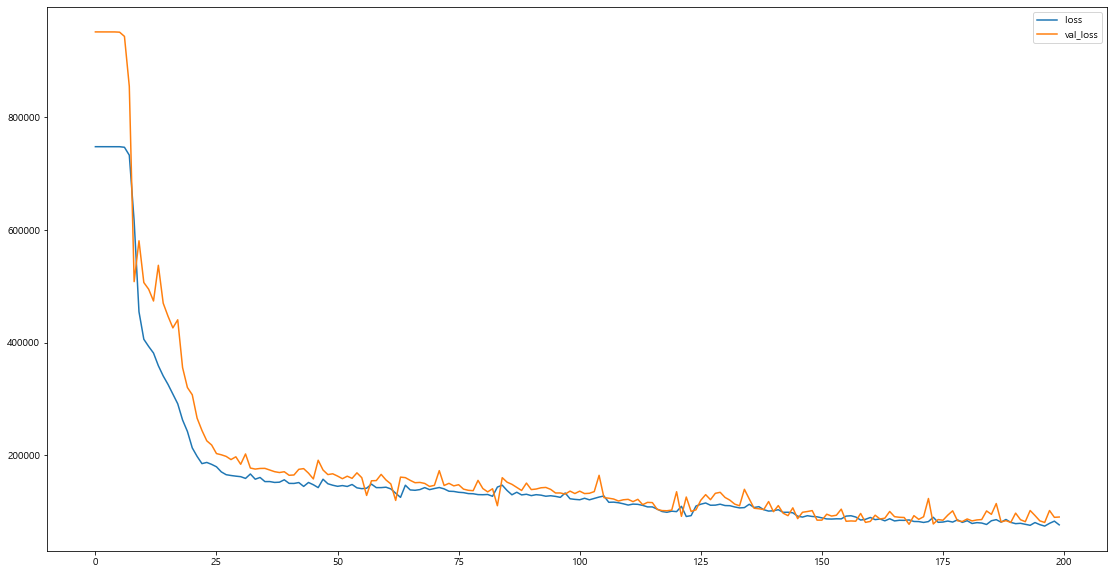

In [ ]:
# LOSS, VAL_LOSS 비교
plt.figure(figsize=(19,10))
plt.plot(history.history['loss'], label = 'loss ')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

### 3-1-4. 예측 (민수용) 

In [ ]:
# 예측
pred_C = model_C.predict(x_val)
pred_C.shape

2/2 [==============================] - 0s 3ms/step


(48, 1)

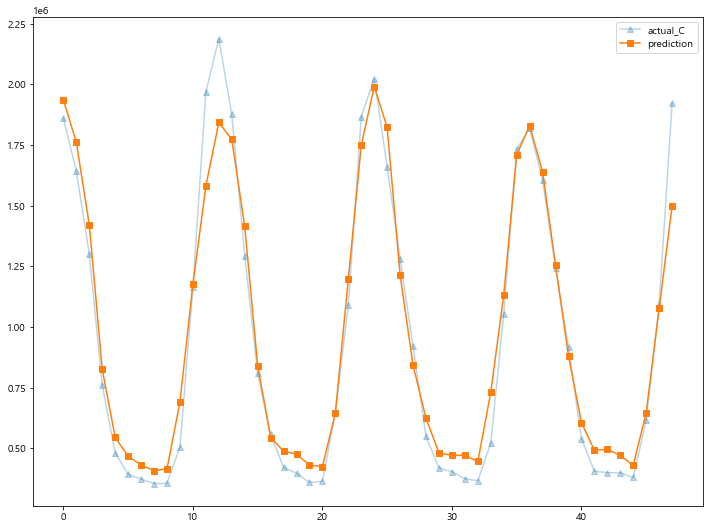

In [ ]:
# 시각화
plt.figure(figsize=(12, 9))
#plt.plot(target_i, label = 'total_actual')
plt.plot(y_val_C,'^-', label = 'actual_C', alpha =0.3)
plt.plot(pred_C,'s-', label = 'prediction')
plt.legend()
plt.show()

## 3-2. 모형 학습_산업용
---
### 3-2-1. 과거 학습 단위 설정 (산업용)

In [ ]:
# train, val, test 범위 설정

TEST_SIZE = 60 # 테스트: 2015~2020(60개월) / 학습: 1996~2014(240개월)
WINDOW_SIZE = 12 # 학습시킬 과거 개월 단위(12개월)

# 학습 데이터 
x_train = train_data_scaled[:-TEST_SIZE] # 1996~2014
x_val = train_data_scaled[-TEST_SIZE:] # 2015~2020
x_test_final = test_data_scaled # 2021~2035(최종 목표)

# target 민수용(스케일 적용)
y_train_I = train_target_scaled_I[:-TEST_SIZE] # 1996~2014
y_val_I = train_target_scaled_I[-TEST_SIZE:] # 2015~2020
# target 민수용(스케일X)
y_train_I = train_target_I[:-TEST_SIZE] # 1996~2014
y_val_I = train_target_I[-TEST_SIZE:] # 2015~2020


# [ 최종 전용 (학습 300개월, 예측 180개월) ] 
# 학습 데이터
x_train = train_data_scaled #1996~2020
# target 민수용(스케일 X)
y_train_I = train_target_I # 1996~2020

In [ ]:
x_test_final.shape

(180, 8)

In [ ]:
# train, valid, test 과거학습 단위 생성

# 과거 12개월-> 다음 1개월 예측( 1996~2014년 )

# 산업용
x_train, y_train_I = make_dataset1(x_train, y_train_I, WINDOW_SIZE)
x_val, y_val_I = make_dataset1(x_val, y_val_I, WINDOW_SIZE)

# test용 (2021~2035년)
x_test_final = make_dataset2(x_test_final, WINDOW_SIZE)

In [ ]:
print('[ 1996~2015 train/target 데이터 ]')
print(f'x_train.shape: {x_train.shape}, y_train_C.shape: {y_train_C.shape}, y_train_I.shape: {y_train_I.shape}') 
print()
print('[ 2016~2020 train/target 데이터 ]')
print(f'x_val.shape  : {x_val.shape},  y_train_C.shape: {y_val_C.shape}, y_train_I.shape: {y_val_I.shape}') 
print()
print('[ 2021~2035 train 데이터 ]')
print(f'x_test.shape : {x_test_final.shape}')
print() 

[ 1996~2015 train/target 데이터 ]
x_train.shape: (288, 12, 8), y_train_C.shape: (228,), y_train_I.shape: (288,)

[ 2016~2020 train/target 데이터 ]
x_val.shape  : (48, 12, 8),  y_train_C.shape: (48,), y_train_I.shape: (48,)

[ 2021~2035 train 데이터 ]
x_test.shape : (168, 12, 8)



### 3-2-2. 모델 구축 (산업용) 

In [ ]:
# create LSTM model
from random import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model_I = Sequential()
model_I.add(LSTM(64, 
                input_shape=(x_train.shape[1], x_train.shape[2]), 
                activation='relu', 
                return_sequences=False)
            )

model_I.add(Dense(1))

In [ ]:
# LSTM model compile

model_I.compile(loss='mae', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# import os
#model_path = 'model_I'
#filename = os.path.join(model_path, 'tmp_checkpoint.h5')
#checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model_I.fit(x_train, y_train_I, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_val, y_val_I))
                                    # callbacks=[early_stop])

Epoch 1/200
18/18 [==============================] - 2s 19ms/step - loss: 432188.6250 - val_loss: 616581.6875
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 432188.2500 - val_loss: 616580.9375
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 432187.3750 - val_loss: 616576.6875
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 432172.5625 - val_loss: 616479.9375
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 431929.3750 - val_loss: 615069.1875
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 429007.1250 - val_loss: 601241.7500
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 406584.0625 - val_loss: 544073.6875
Epoch 8/200
18/18 [==============================] - 0s 5ms/step - loss: 338584.6875 - val_loss: 294875.6562
Epoch 9/200
18/18 [==============================] - 0s 5ms/step - loss: 106164.1953 - val_loss: 86708.3750
Epoch 10/200
18/18 

### 3-2-3. loss, val_loss 시각화 및 비교 (산업용) 

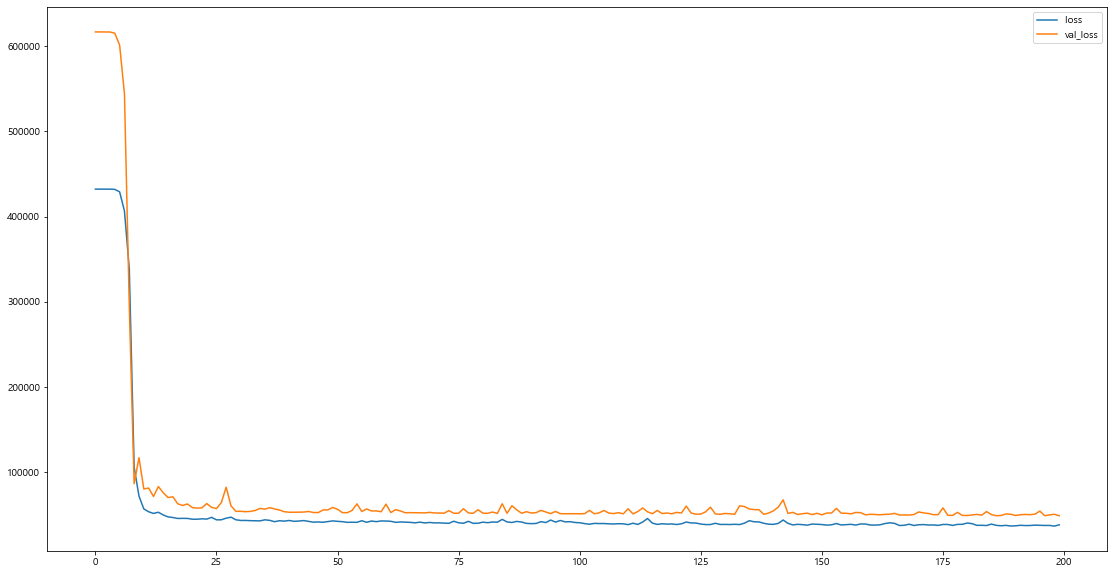

In [ ]:
# LOSS, VAL_LOSS 비교
plt.figure(figsize=(19,10))
plt.plot(history.history['loss'], label = 'loss ')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

### 3-2-4. 예측 (산업용) 

In [ ]:
# 예측
pred_I = model_I.predict(x_val)
pred_I.shape

2/2 [==============================] - 0s 3ms/step


(48, 1)

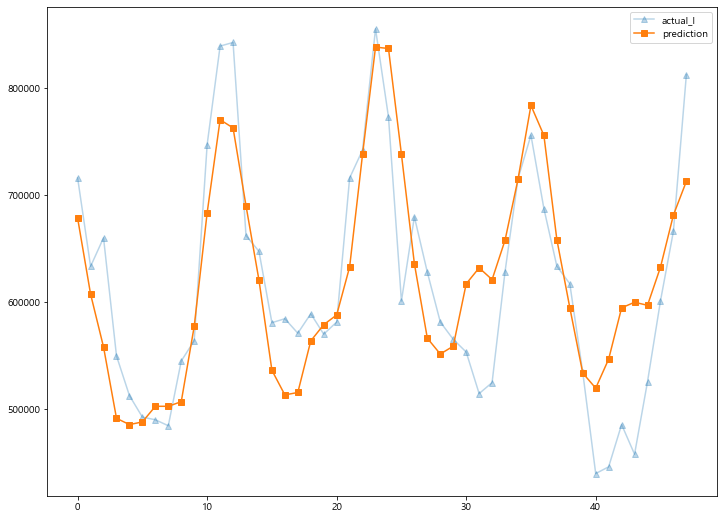

In [ ]:
# 시각화
plt.figure(figsize=(12, 9))
#plt.plot(target_i, label = 'total_actual')
plt.plot(y_val_I,'^-', label = 'actual_I',alpha=0.3)
plt.plot(pred_I,'s-', label = 'prediction')
plt.legend()
plt.show()

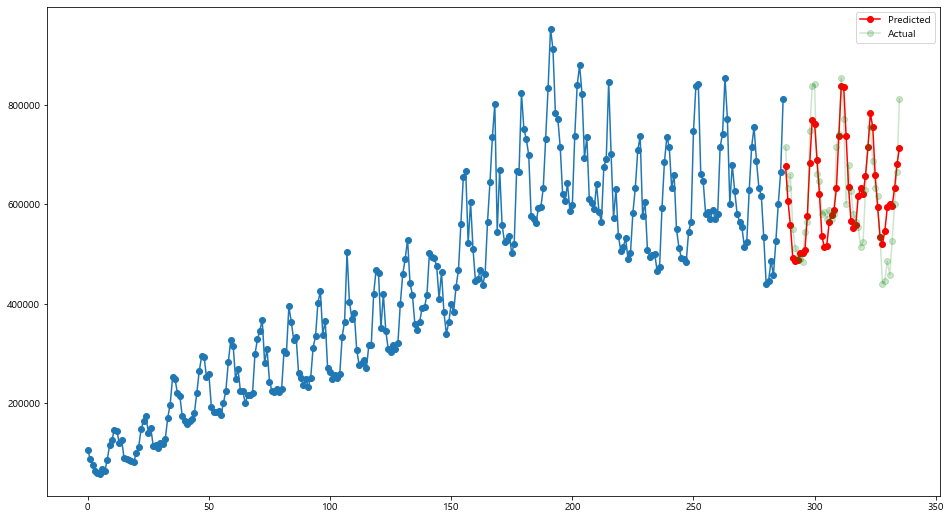

In [ ]:
# [ 예측 결과 시각화: 전체흐름 파악용 ]
a_axis = np.arange(0, len(y_train_I))
b_axis = np.arange(len(y_train_I), len(y_train_I) + len(pred_I))

plt.figure(figsize=(16,9)) # .reshape(x_train.shape[0],) 
plt.plot(a_axis, y_train_I, 'o-') 
plt.plot(b_axis, pred_I, 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_val_I, 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()

### 최종 2021~2035 예측 및 시각화 
--- 

In [ ]:
# 모듈 로딩
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl

mpl.rc('font',family='Malgun Gothic')

In [ ]:
POWER_FIRE = pd.read_csv('./pred_POWER_FIRE.csv')
ELEC_ALL = pd.read_csv('./pred_ELEC_ALL.csv')

POWER_FIRE = POWER_FIRE['yhat']
ELEC_ALL = ELEC_ALL['yhat']

In [ ]:
# 모델 학습할 데이터
train_feature = pd.read_csv('./data_tomato.csv')
train_target = pd.read_csv('./target.csv')
train_feature

# 자체 예측한 feature
future_feature = pd.read_csv('./data_future.csv')
future_feature

train_all =pd.concat([train_feature,train_target[['CIVIL','IND']]], axis =1)
train_all.info()


future_feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                300 non-null    object 
 1   TCL_AT              300 non-null    float64
 2   TCL_LT              300 non-null    float64
 3   TCL_HT              300 non-null    float64
 4   TEMP_EF_CAP         300 non-null    float64
 5   TEMP_EF_DONGNAM     300 non-null    float64
 6   TEMP_EF_DAEGYUNG    300 non-null    float64
 7   TEMP_EF_CHOONG      300 non-null    float64
 8   TEMP_EF_HONAM       300 non-null    float64
 9   TEMP_EF_MEAN        300 non-null    float64
 10  POWER_WATER         300 non-null    int64  
 11  POWER_FIRE          300 non-null    int64  
 12  POWER_NUCLEAR       300 non-null    int64  
 13  POWER_NAEYEON       300 non-null    int64  
 14  POWER_GROUP         300 non-null    int64  
 15  POWER_TRANS         300 non-null    int64  
 16  POWER_GA

,DATE,POWER_GAS,ELEC_IND_SUM,OIL_PRICE,QVA,TCL_LT,TEMP_EF,ELEC_SERVICE
0,2021-01-01,21004815,24009895,106.270957,122715.511387,-0.819359,3.720112,1.546123e+07
1,2021-02-01,19006411,22411095,106.452033,123791.588066,-0.488770,3.663880,1.485668e+07
2,2021-03-01,17216940,23047185,106.615613,123126.447539,0.108879,3.557796,1.291000e+07
3,2021-04-01,15290843,22640767,106.796638,123534.791822,0.929050,3.418933,1.228525e+07
4,2021-05-01,15763108,22310541,106.971887,123756.051487,1.691170,3.297840,1.092951e+07
...,...,...,...,...,...,...,...,...
175,2035-08-01,23623051,27327684,137.373064,144116.665066,3.940146,3.173664,1.651412e+07
176,2035-09-01,21558395,26481467,137.554127,145813.462779,2.922097,3.231943,1.524711e+07
177,2035-10-01,20954172,26795426,137.729350,145918.753203,1.620847,3.358512,1.358630e+07
178,2035-11-01,21861274,27345267,137.910414,146304.640846,0.430566,3.507064,1.477608e+07


In [ ]:
# 자체 예측한 feature
future_feature = pd.read_csv('./data_future.csv')
future_feature = pd.concat([future_feature,POWER_FIRE,ELEC_ALL], axis=1)
future_feature.columns = ['DATE', 'POWER_GAS', 'ELEC_IND_SUM', 'OIL_PRICE', 'QVA', 'TCL_LT',
       'TEMP_EF', 'ELEC_SERVICE', 'POWER_FIRE', 'ELEC_ALL']
future_feature

,DATE,POWER_GAS,ELEC_IND_SUM,OIL_PRICE,QVA,TCL_LT,TEMP_EF,ELEC_SERVICE,POWER_FIRE,ELEC_ALL
0,2021-01-01,21004815,24009895,106.270957,122715.511387,-0.819359,3.720112,1.546123e+07,11984432,49065403
1,2021-02-01,19006411,22411095,106.452033,123791.588066,-0.488770,3.663880,1.485668e+07,10016106,46838260
2,2021-03-01,17216940,23047185,106.615613,123126.447539,0.108879,3.557796,1.291000e+07,11379175,43744720
3,2021-04-01,15290843,22640767,106.796638,123534.791822,0.929050,3.418933,1.228525e+07,9588955,42509561
4,2021-05-01,15763108,22310541,106.971887,123756.051487,1.691170,3.297840,1.092951e+07,8879315,40265856
...,...,...,...,...,...,...,...,...,...,...
175,2035-08-01,23623051,27327684,137.373064,144116.665066,3.940146,3.173664,1.651412e+07,14316637,60281687
176,2035-09-01,21558395,26481467,137.554127,145813.462779,2.922097,3.231943,1.524711e+07,12565225,57078253
177,2035-10-01,20954172,26795426,137.729350,145918.753203,1.620847,3.358512,1.358630e+07,13568001,54776519
178,2035-11-01,21861274,27345267,137.910414,146304.640846,0.430566,3.507064,1.477608e+07,15354540,56697266


In [ ]:
# 1996~2020
train_all = train_all[['DATE','POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT','TEMP_EF_MEAN','ELEC_SERVICE','POWER_FIRE','ELEC_ALL', 'CIVIL','IND']]

# 1996~2020 feature
train_data = train_all.drop(['DATE','CIVIL','IND'], axis =1)

# 1996~2020 target
train_target = train_all[['CIVIL','IND']]
train_target_C = train_all['CIVIL']
train_target_I = train_all['IND']

# 2021~2035
test_data = future_feature.drop(['DATE'], axis =1)
test_data.columns = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT','TEMP_EF_MEAN','ELEC_SERVICE','POWER_FIRE','ELEC_ALL']

# 1996~2035
feature_all = pd.concat([train_data,test_data])
feature_all = feature_all.reset_index(drop = True) 
feature_all

,POWER_GAS,ELEC_INDSUM,OIL_PRICE,QVA,TCL_LT,TEMP_EF_MEAN,ELEC_SERVICE,POWER_FIRE,ELEC_ALL
0,8408979,9236808,27.860000,36550.300000,-0.189311,3.744768,3.616542e+06,2119473,16224867
1,7593086,8465308,29.040000,36751.000000,-0.226982,3.732234,3.551611e+06,1875589,15363840
2,8306941,9677322,27.990000,36951.700000,-0.045631,3.621268,3.333225e+06,1923728,16094268
3,8299351,9650845,28.740000,37152.400000,0.029456,3.460496,3.430624e+06,1747174,16266027
4,8156027,9658045,29.180000,37365.733333,0.242892,3.305460,3.333483e+06,2092955,16028072
...,...,...,...,...,...,...,...,...,...
475,23623051,27327684,137.373064,144116.665066,3.940146,3.173664,1.651412e+07,14316637,60281687
476,21558395,26481467,137.554127,145813.462779,2.922097,3.231943,1.524711e+07,12565225,57078253
477,20954172,26795426,137.729350,145918.753203,1.620847,3.358512,1.358630e+07,13568001,54776519
478,21861274,27345267,137.910414,146304.640846,0.430566,3.507064,1.477608e+07,15354540,56697266


In [ ]:
# 과거 데이터 학습 함수(target 존재시)
def make_dataset1(data, label, window_size=12):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size): # 데이터 개월 개수 - 학습할 과거개월수 
        feature_list.append(np.array(data.iloc[i:i+window_size])) # 시작 개월 ~ 12개월
        label_list.append(np.array(label.iloc[i+window_size])) # 12개월 후 타겟 데이터
    return np.array(feature_list), np.array(label_list)

# 과거 데이터 학습 함수(target 존재하지 않을 시)
# 최종 test용
def make_dataset3(data, window_size=12):
    test_list = []
    for i in range(len(data)-window_size): # 데이터 개월 수 
        test_list.append(np.array(data.iloc[i:i+window_size])) # 시작 개월 ~ 12개월 # 12개월 후 타겟 데이터
    return np.array(test_list)

# 1. 산업용(IND)
---

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_target = MinMaxScaler()
# 전체
scale_cols = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT','TEMP_EF_MEAN','ELEC_SERVICE','POWER_FIRE','ELEC_ALL']
# 산업용
# scale_cols = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TEMP_EF_MEAN','ELEC_SERVICE','POWER_FIRE','ELEC_ALL']

# 스케일링
train_data_scaled = scaler.fit_transform(train_data[scale_cols])
feature_all_scaled = scaler.fit_transform(feature_all[scale_cols])

train_target_scaled = scaler_target.fit_transform(train_target)

# 데이터프레임으로 변환
train_data_scaled = pd.DataFrame(train_data_scaled)
feature_all_scaled = pd.DataFrame(feature_all_scaled)
train_target_scaled = pd.DataFrame(train_target_scaled)

# 데이터프레임 컬럼명 생성
train_data_scaled.columns = scale_cols
feature_all_scaled.columns = scale_cols

train_target_scaled.columns = ['CIVIL','IND']
train_target_scaled_C = train_target_scaled['CIVIL']
train_target_scaled_I = train_target_scaled['IND']

In [ ]:
feature_all_scaled.shape

(480, 9)

In [ ]:
# [ 최종 전용 (학습 300개월, 예측 180개월) ] 

# 과거 학습단위 설정 (단위: 과거 직전 개월 수 -> 다음 1개월 예측 )
WINDOW_SIZE = 14

# 학습 데이터
x_train = train_data_scaled #1996~2020
# target 산업용(스케일 X)
y_train_I = train_target_I # 1996~2020

# 최종테스트용 x_test
x_test_final = feature_all_scaled[300 - WINDOW_SIZE:]


x_train.shape, y_train_I.shape, x_test_final.shape

((300, 9), (300,), (194, 9))

In [ ]:
# train, valid, test 과거학습 단위 생성

# 산업용
x_train, y_train_I = make_dataset1(x_train, y_train_I, WINDOW_SIZE)

# test용 (2021~2035년)
x_test_final = make_dataset3(x_test_final, WINDOW_SIZE)

In [ ]:
print('[ 1996~2015 train/target 데이터 ]')
print(f'x_train.shape: {x_train.shape}, y_train_I.shape: {y_train_I.shape}') 
print()
print('[ 2021~2035 train 데이터 ]')
print(f'x_test_final.shape : {x_test_final.shape}')
print() 

[ 1996~2015 train/target 데이터 ]
x_train.shape: (286, 14, 9), y_train_I.shape: (286,)

[ 2021~2035 train 데이터 ]
x_test_final.shape : (180, 14, 9)



In [ ]:
# create LSTM model-------------------------------------------------------------------
from random import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM,Bidirectional

model_I = Sequential()
model_I.add((LSTM(32,
                input_shape=(x_train.shape[1], x_train.shape[2]), 
                activation='relu', 
                return_sequences=False)
            ))


model_I.add(Dense(1))

# LSTM model compile-------------------------------------------------------------------

model_I.compile(loss='mae', optimizer='adam')

history = model_I.fit(x_train, y_train_I, 
                                    epochs=300, 
                                    batch_size=12)


Epoch 1/300
24/24 [==============================] - 1s 3ms/step - loss: 434539.8438
Epoch 2/300
24/24 [==============================] - 0s 3ms/step - loss: 434433.5625
Epoch 3/300
24/24 [==============================] - 0s 3ms/step - loss: 357310.8750
Epoch 4/300
24/24 [==============================] - 0s 3ms/step - loss: 127154.3516
Epoch 5/300
24/24 [==============================] - 0s 3ms/step - loss: 90443.9688
Epoch 6/300
24/24 [==============================] - 0s 4ms/step - loss: 78627.2656
Epoch 7/300
24/24 [==============================] - 0s 4ms/step - loss: 67852.0000
Epoch 8/300
24/24 [==============================] - 0s 4ms/step - loss: 68281.4609
Epoch 9/300
24/24 [==============================] - 0s 4ms/step - loss: 68350.4766
Epoch 10/300
24/24 [==============================] - 0s 4ms/step - loss: 78263.7266
Epoch 11/300
24/24 [==============================] - 0s 4ms/step - loss: 67137.0938
Epoch 12/300
24/24 [==============================] - 0s 3ms/step - lo

In [ ]:
pred_final_IND = model_I.predict(x_test_final)
pred_final_IND.shape

6/6 [==============================] - 0s 2ms/step


(180, 1)

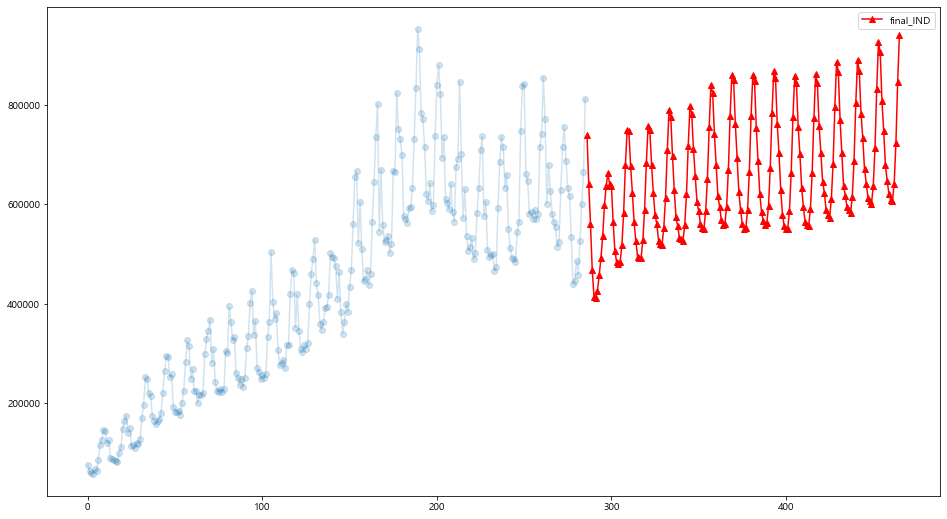

In [ ]:
# [ 예측 결과 시각화: 전체흐름 파악용 ]
a_axis = np.arange(0, len(y_train_I))
b_axis = np.arange(len(y_train_I), len(y_train_I) + len(pred_final_IND))

plt.figure(figsize=(16,9)) # .reshape(x_train.shape[0],) 
plt.plot(a_axis, y_train_I, 'o-',alpha=0.2) 
#plt.plot(b_axis, pred_I, 'o-', color='blue', label='Predicted')
#plt.plot(b_axis, y_val_I, 'o-', color='green', alpha=0.2, label='Actual')
plt.plot(b_axis, pred_final_IND, '^-', color='red', label='final_IND')
plt.legend()
plt.show()

# 2. 민수용(CIVIL)
---

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_target = MinMaxScaler()
# 전체
scale_cols = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT','TEMP_EF_MEAN','ELEC_SERVICE','POWER_FIRE','ELEC_ALL']
# 민수용
# scale_cols = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TEMP_EF_MEAN']

# 스케일링
train_data_scaled = scaler.fit_transform(train_data[scale_cols])
feature_all_scaled = scaler.fit_transform(feature_all[scale_cols])

train_target_scaled = scaler_target.fit_transform(train_target)

# 데이터프레임으로 변환
train_data_scaled = pd.DataFrame(train_data_scaled)
feature_all_scaled = pd.DataFrame(feature_all_scaled)
train_target_scaled = pd.DataFrame(train_target_scaled)

# 데이터프레임 컬럼명 생성
train_data_scaled.columns = scale_cols
feature_all_scaled.columns = scale_cols

train_target_scaled.columns = ['CIVIL','IND']
train_target_scaled_C = train_target_scaled['CIVIL']
train_target_scaled_I = train_target_scaled['IND']

In [ ]:
# [ 최종 전용 (학습 300개월, 예측 180개월) ] 

# 과거 학습 단위 설정
WINDOW_SIZE = 14  # 단위:직전 개월 수 -> 다음 1개월 예측

# 학습 데이터
x_train = train_data_scaled #1996~2020
# target 산업용(스케일 X)
y_train_C = train_target_C # 1996~2020
# x_test(최종테스트용)
x_test_final = feature_all_scaled[300-WINDOW_SIZE:] # 과거단위 학습으로 WINDOW_SIZE만큼 이전 데이터 필요


WINDOW_SIZE, x_train.shape, y_train_C.shape, x_test_final.shape

(14, (300, 9), (300,), (194, 9))

In [ ]:
# train, valid, test 과거학습 단위 생성

##########   과거학습 함수 실행   ##################### 
# 산업용
x_train, y_train_C = make_dataset1(x_train, y_train_C, WINDOW_SIZE)
# test용 (2021~2035년)
x_test_final = make_dataset3(x_test_final, WINDOW_SIZE)

# shape check
print('[ 1996~2015 train/target 데이터 ]')
print(f'x_train.shape: {x_train.shape}, y_train_I.shape: {y_train_C.shape}') 
print()
print('[ 2021~2035 train 데이터 ]')
print(f'x_test_final.shape : {x_test_final.shape}')
print() 

[ 1996~2015 train/target 데이터 ]
x_train.shape: (286, 14, 9), y_train_I.shape: (286,)

[ 2021~2035 train 데이터 ]
x_test_final.shape : (180, 14, 9)



In [ ]:
# create LSTM model-------------------------------------------------------------------
from random import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model_C = Sequential()
model_C.add(Bidirectional(LSTM(32, 
                input_shape=(x_train.shape[1], x_train.shape[2]), 
                activation='relu', 
                return_sequences=False)
            ))

model_C.add(Dense(1))

# LSTM model compile-------------------------------------------------------------------

model_C.compile(loss='mae', optimizer='adam')

history = model_C.fit(x_train, y_train_C, 
                                    epochs=500, 
                                    batch_size=16)


Epoch 1/500


In [ ]:
# 예측 
pred_final_CIVIL = model_C.predict(x_test_final)
pred_final_CIVIL.shape

6/6 [==============================] - 0s 2ms/step


(180, 1)

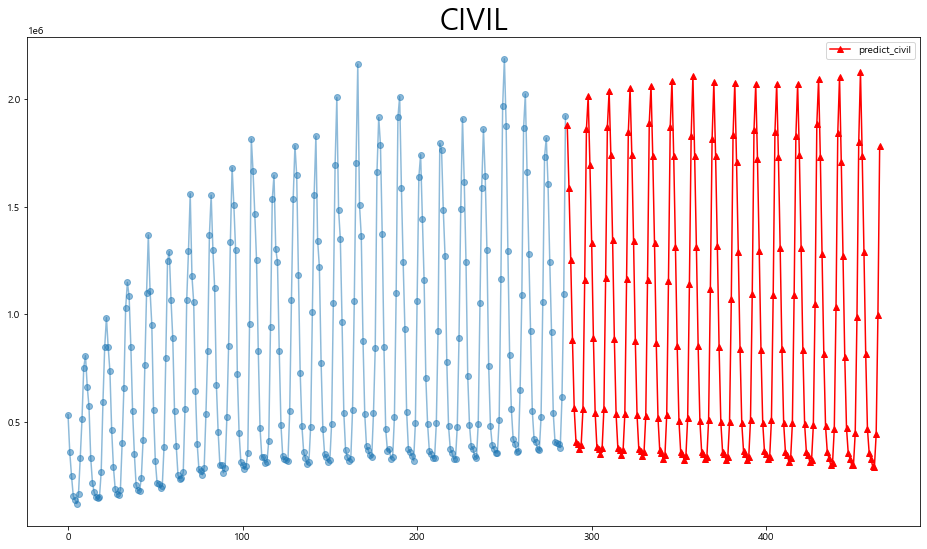

In [ ]:
# [ 예측 결과 시각화: 전체흐름 파악용 ]

# x축 범위 설정(a_axis: 학습데이터, y_axis: 예측 데이터)
a_axis = np.arange(0, len(y_train_C))
b_axis = np.arange(len(y_train_C), len(y_train_C) + len(pred_final_CIVIL))

plt.figure(figsize=(16,9))
plt.title('CIVIL',fontsize=30)
plt.plot(a_axis, y_train_C, 'o-',alpha=0.5) 
plt.plot(b_axis, pred_final_CIVIL, '^-', color='red', label='predict_civil')
plt.legend()
plt.show()

In [ ]:
pred_final_CIVIL.shape, pred_final_IND.shape

((180, 1), (180, 1))